# Sentiment Analysis of IMDb Movie Reviews Using BERT

Source of this tutorial is [here](https://github.com/amaiya/ktrain). More detailed explanation can be found [here](https://towardsdatascience.com/deconstructing-bert-distilling-6-patterns-from-100-million-parameters-b49113672f77) and [here](https://towardsdatascience.com/deconstructing-bert-part-2-visualizing-the-inner-workings-of-attention-60a16d86b5c1).

In this notebook, we build a binary text classifier to classify movie reviews as either positive or negative using [BERT](https://arxiv.org/abs/1810.04805), a pretrained NLP model that can be used for transfer learning on text data.  We will use the [*ktrain* library](https://github.com/amaiya/ktrain), a lightweight wrapper around Keras to help train (and deploy) neural networks.  For more information on *ktrain*, see [this Medium post](https://towardsdatascience.com/ktrain-a-lightweight-wrapper-for-keras-to-help-train-neural-networks-82851ba889c).

We will begin by installing *ktrain* and importing the required *ktrain* modules.

In [1]:
# install ktrain
!pip3 install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.6 MB/s 
     |████████████████████████████████| 2.8 MB 51.8 MB/s 
     |████████████████████████████████| 981 kB 49.8 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 1.2 MB 68.5 MB/s 
     |████████████████████████████████| 263 kB 74.4 MB/s 
     |████████████████████████████████| 468 kB 65.1 MB/s 
     |████████████████████████████████| 3.3 MB 43.6 MB/s 
     |████████████████████████████████| 880 kB 60.3 MB/s 
     |████████████████████████████████| 101 kB 14.1 MB/s 
     |████████████████████████████████| 596 kB 63.7 MB/s 
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=840071c883d985ded5b01ea07dcf826127a7a1a5c34da9bb108d06fc48612e90
  Stored in directory: /root/.cache/pip/wheels/a4/e8/45/842b3a39831261aef9154b907eacbc4ac99499a99ae829b0

In [2]:
# import ktrain
import ktrain
from ktrain import text

In [3]:
ktrain.__version__

'0.31.2'

Next, we will fetch and extract the IMDb movie review dataset.

In [4]:
# download IMDb movie review dataset
import tensorflow as tf
dataset = tf.keras.utils.get_file(
    fname="aclImdb.tar.gz", 
    origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
    extract=True,
)

84140032/84125825 [==============================] - 8s 0us/step


In [5]:
# show
dataset

'/root/.keras/datasets/aclImdb.tar.gz'

In [12]:
# set path to dataset
import os.path
#dataset = '/root/.keras/datasets/aclImdb'
IMDB_DATADIR = os.path.join(os.path.dirname(dataset), 'aclImdb')
print(IMDB_DATADIR)

/root/.keras/datasets/aclImdb


In [7]:
# import 
import os

In [10]:
# check
# /root
os.listdir('/root')

['.profile',
 '.bashrc',
 '.cache',
 '.local',
 '.keras',
 '.tmux.conf',
 '.npm',
 '.config',
 '.jupyter',
 '.ipython']

## STEP 1:  Load and Preprocess the Dataset

The `texts_from_folder` function will load the training and validation data from the specified folder and automatically preprocess it according to BERT's requirements.  In doing so, the BERT model and vocabulary will be automatically downloaded.

This code might take a little while, so please grab a cup of coffee and be patient.

In [13]:
# get data path
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(
    IMDB_DATADIR,
    maxlen=500,
    preprocess_mode='bert',
    train_test_names=['train', 'test'],
    classes=['pos', 'neg'] )

detected encoding: utf-8
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [14]:
# numpy
import numpy as np

In [15]:
# display dimension
np.asarray(x_train).shape, np.asarray(y_train).shape, np.asarray(x_test).shape, np.asarray(y_test).shape

((2, 25000, 500), (25000, 2), (2, 25000, 500), (25000, 2))

In [16]:
# draft
np.asarray(x_train)[0], np.asarray(x_train)[1], np.asarray(x_test)[0], np.asarray(x_test)[1]

(array([[ 101, 5717, 2154, ...,    0,    0,    0],
        [ 101, 2616, 2064, ...,    0,    0,    0],
        [ 101, 3071, 3248, ...,    0,    0,    0],
        ...,
        [ 101, 3083, 3427, ...,    0,    0,    0],
        [ 101, 1045, 3422, ...,    0,    0,    0],
        [ 101, 7078, 1996, ...,    0,    0,    0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[  101,  2320,  2153, ...,     0,     0,     0],
        [  101,  2023,  2003, ...,     0,     0,     0],
        [  101,  2034,  1997, ...,     0,     0,     0],
        ...,
        [  101,  2013,  1996, ..., 18605,  1010,   102],
        [  101,  2023,  3185, ...,     0,     0,     0],
        [  101,  1045,  1005, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..

In [17]:
# preproc
preproc

## STEP 2:  Load a pretrained BERT model and wrap it in a `ktrain.Learner` object

This step can be condensed into a single line of code, but we execute it as two lines for clarity. (You can ignore the deprecation warnings arising from Keras 2.2.4 with TensorFlow 1.14.0.)  

In [ ]:
# model
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)

Is Multi-Label? False
maxlen is 500
done.


In [ ]:
# summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 500)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 500)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 500, 768),  23440896    ['Input-Token[0][0]']            
 g)                              (30522, 768)]                                                    
                                                                                                  
 Embedding-Segment (Embedding)  (None, 500, 768)     1536        ['Input-Segment[0][0]']    

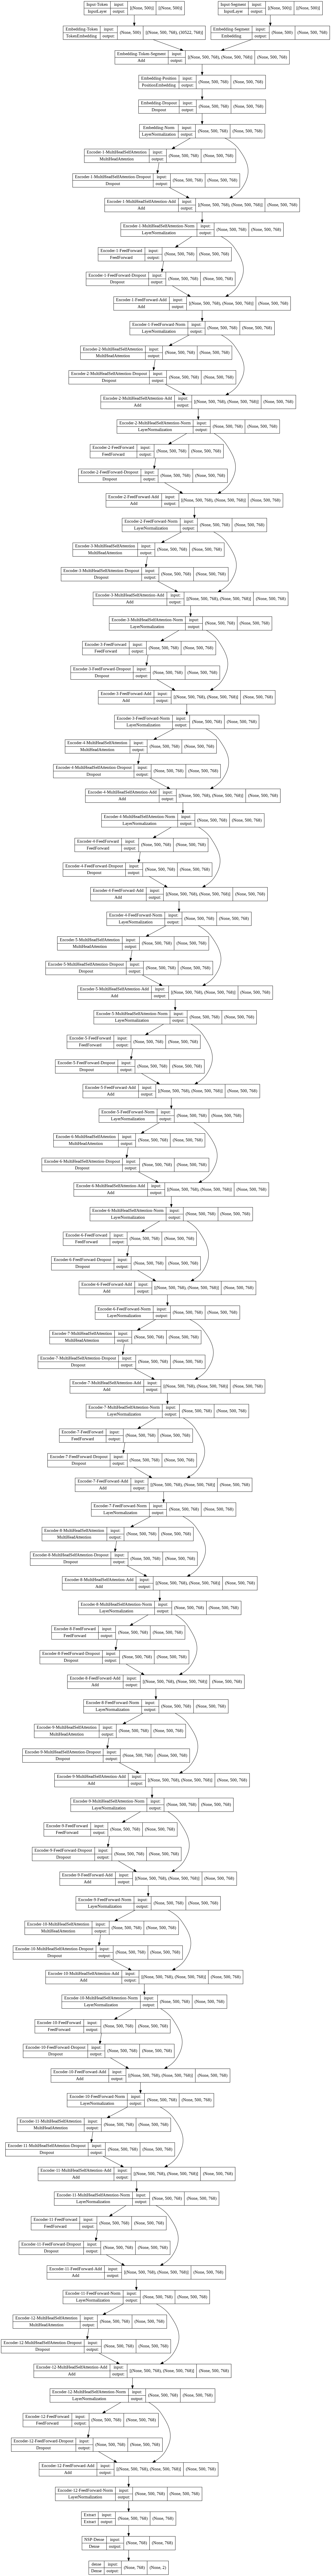

In [ ]:
# plot model
tf.keras.utils.plot_model(model, show_shapes=True)

## STEP 3:  Train and Fine-Tune the Model on the IMDb dataset

We employ the `learner.fit_onecycle` method in *ktrain* that employs the use of a [1cycle learning  rate schedule](https://arxiv.org/pdf/1803.09820.pdf).  We use a learning rate of 2e-5 based on recommendations from [the original paper](https://arxiv.org/abs/1810.04805).

As can be seen, we achieve a **93.92% validation accuracy** in a single epoch. This may take a while.

In [ ]:
# train
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
4167/4167 [==============================] - 1523s 359ms/step - loss: 0.2629 - accuracy: 0.8901 - val_loss: 0.1632 - val_accuracy: 0.9370


Since it does not appear we are overfitting yet, we could train for an additional epoch or two for even higher accuracy.  

Feel free to try it out on your own.